<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introducción" data-toc-modified-id="Introducción-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introducción</a></span></li><li><span><a href="#Datos-y-librerias" data-toc-modified-id="Datos-y-librerias-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Datos y librerias</a></span><ul class="toc-item"><li><span><a href="#Conociendo-los-datos" data-toc-modified-id="Conociendo-los-datos-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Conociendo los datos</a></span><ul class="toc-item"><li><span><a href="#Columnas-con-valores-atípicos" data-toc-modified-id="Columnas-con-valores-atípicos-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Columnas con valores atípicos</a></span></li><li><span><a href="#Columnas-categóricas" data-toc-modified-id="Columnas-categóricas-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Columnas categóricas</a></span></li></ul></li><li><span><a href="#Preparación-de-datos" data-toc-modified-id="Preparación-de-datos-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Preparación de datos</a></span><ul class="toc-item"><li><span><a href="#Columnas-a-eliminar" data-toc-modified-id="Columnas-a-eliminar-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Columnas a eliminar</a></span></li><li><span><a href="#Podado-de-datos-atípicos" data-toc-modified-id="Podado-de-datos-atípicos-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Podado de datos atípicos</a></span></li><li><span><a href="#Datos-vacíos" data-toc-modified-id="Datos-vacíos-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Datos vacíos</a></span></li><li><span><a href="#Columnas-str" data-toc-modified-id="Columnas-str-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Columnas <code>str</code></a></span></li></ul></li><li><span><a href="#Features-y-targets" data-toc-modified-id="Features-y-targets-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Features y targets</a></span></li></ul></li><li><span><a href="#Entrenamiento-del-modelo" data-toc-modified-id="Entrenamiento-del-modelo-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Entrenamiento del modelo</a></span><ul class="toc-item"><li><span><a href="#Prueba-de-cordura-con-regresión-lineal" data-toc-modified-id="Prueba-de-cordura-con-regresión-lineal-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Prueba de cordura con regresión lineal</a></span></li><li><span><a href="#Bosque-aleatorio-con-ajuste-de-hiperparámetros" data-toc-modified-id="Bosque-aleatorio-con-ajuste-de-hiperparámetros-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Bosque aleatorio con ajuste de hiperparámetros</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#LightGBM-con-ajuste-de-hiperparámetros" data-toc-modified-id="LightGBM-con-ajuste-de-hiperparámetros-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>LightGBM con ajuste de hiperparámetros</a></span></li></ul></li><li><span><a href="#Análisis-del-modelo" data-toc-modified-id="Análisis-del-modelo-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Análisis del modelo</a></span></li></ul></div>

# Introducción

El servicio de venta de autos usados Rusty Bargain está desarrollando una aplicación para atraer nuevos clientes. Gracias a esa app, puedes averiguar rápidamente el valor de mercado de tu coche. Tienes acceso al historial: especificaciones técnicas, versiones de equipamiento y precios. Tienes que crear un modelo que determine el valor de mercado.
A Rusty Bargain le interesa:
- la calidad de la predicción;
- la velocidad de la predicción;
- el tiempo requerido para el entrenamiento

# Datos y librerias

In [51]:
# Cargamos las librerias que nos servirán para nuestro análisis
%time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

import lightgbm as lgb

from sklearn.preprocessing import OrdinalEncoder

from catboost import CatBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from scipy.spatial import distance
from numpy.random import RandomState

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.77 µs


In [52]:
# Cargamos los datos de cada tabla por separado

try:
    df = pd.read_csv('C:/Users/tomas/Downloads/car_data.csv')
except:
    df = pd.read_csv('/datasets/car_data.csv')

## Conociendo los datos

In [53]:
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

Necesitamos tratar con los valores vacíos en `VehicleType`, `FuelType` y `NotRepaired`.

In [55]:
df.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


Podemos ver que tenemos algunas columnas con valores y distribuciones extrañas. Por ejemplo la columna `NumberOfPictures` está repleta de 0, por lo que no nos aporta información realmente, la eliminaremos en una sección siguiente. Por otro lado, las columnas `Price`, `RegistrationYear` y `Power` parecen tener un aumento muy grande en el último cuarto de los datos. Esto se ve sobre todo en la columna `Power`, en donde el valor máximo es casi 14 veces mayor que el tercer cuartil.

Finalmente en la columna `Mileage` podemos ver que tenemos un valor máximo que parece ser igual para la mayoría de los datos. Esto podría deberse a que es el máximo aceptado por la plataforma en donde se subieron estos anuncios.

### Columnas con valores atípicos

Comencemos viendo como se distribuyen los valores de `Mileage`.

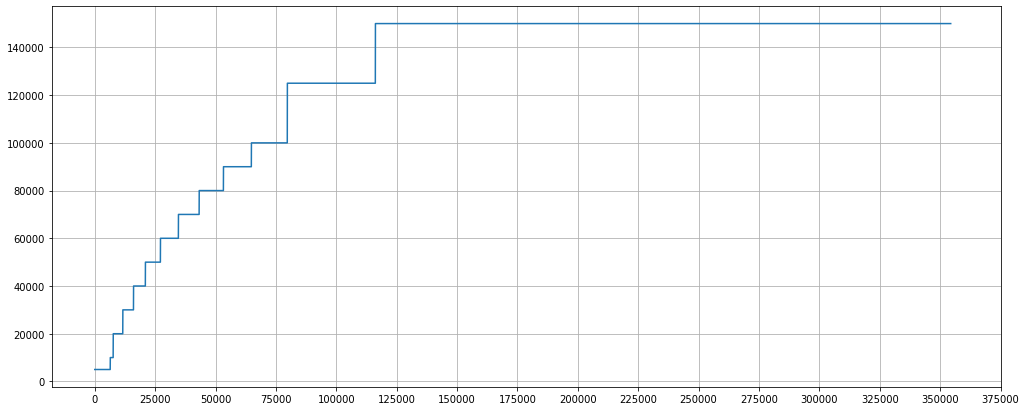

In [56]:
df['Mileage'].sort_values(ignore_index=True).plot(figsize=(17,7), grid=True)
plt.xticks(np.arange(0,375001, 25000))
plt.show()

Como era de esperarse, los valores de esta columna se encuentran escalados. Esto probablemente significa que al subir el anuncio, se presentan algunas opciones para el millaje del automóvil y no se da libertad a la persona para poner cualquier valor. Entonces podemos pensar en el valor máximo de esta columna como igual o mayor a este para el millaje del auto.

Veamos la columna `Power`ahora.

<AxesSubplot:>

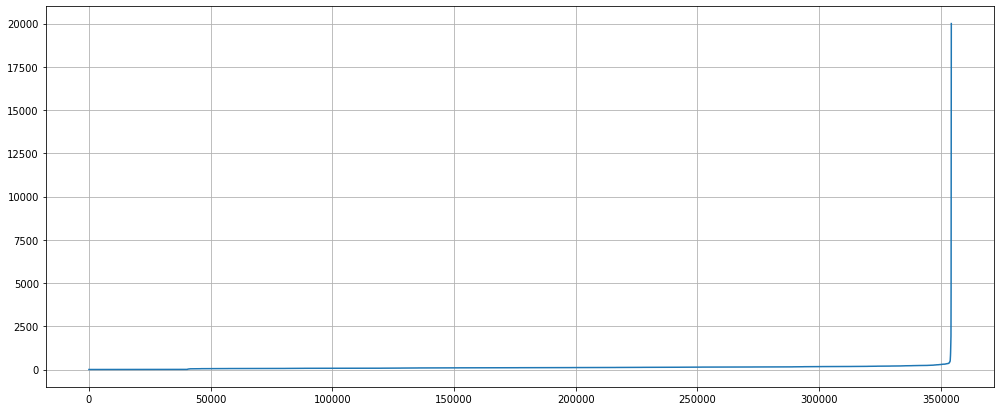

In [57]:
df['Power'].sort_values(ignore_index=True).plot(figsize=(17,7), grid=True)

Claramente tenemos un problema al final de estos datos. Creemos un límite superior y veamos como se distribuyen los valores superiores.

<AxesSubplot:>

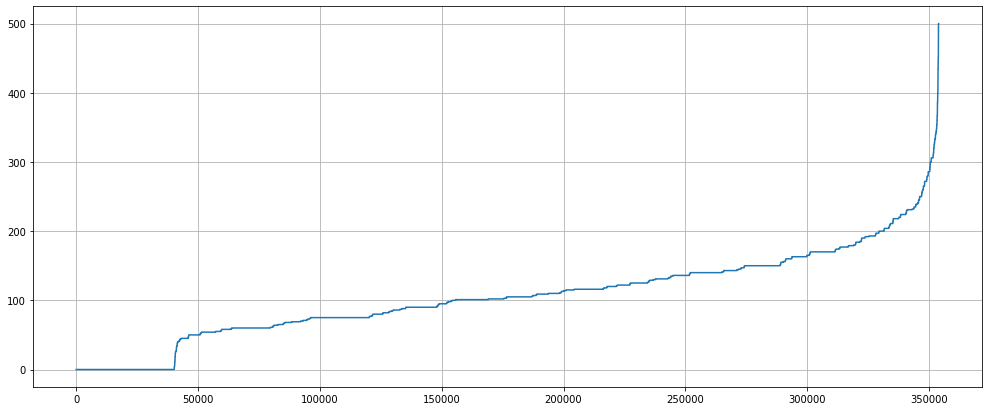

In [58]:
df[df['Power']<=500]['Power'].sort_values(ignore_index=True).plot(figsize=(17,7), grid=True)

In [59]:
len(df[df['Power']>0])/len(df)

0.8864883779337357

Ahora si podemos ver con mayor claridad los valores de esta columna. Nos encontramos con algunos anuncios que tienen 0 de potencia en el extremo inferior. Esto no tiene sentido, aunque esto corresponda a más del 10% de los datos, debemos eliminar estas filas. Esperemos que esto se lleve algunos de los valores vacíos y atípicos de otras columnas. Si es que nos fijamos en el extremo superior, podemos ver que los valores parecen tener un crecimiento excesivo luego del valor 300 de poder.

<AxesSubplot:>

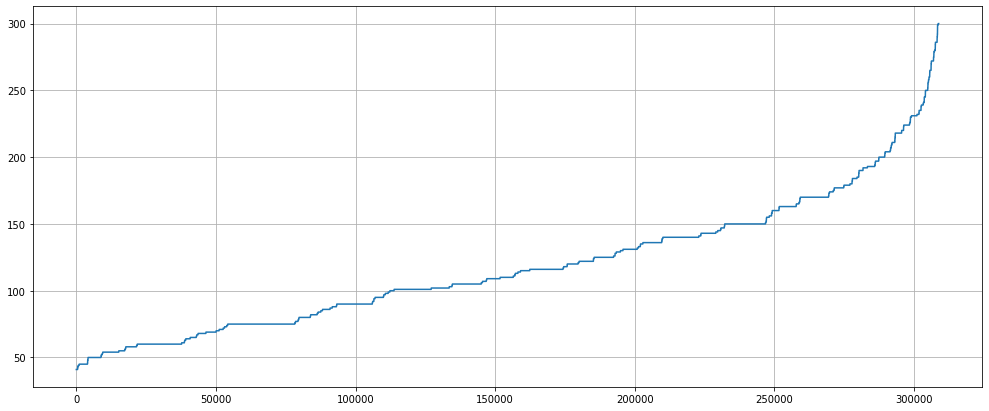

In [60]:
df[(df['Power']<=300) & (df['Power']>40)]['Power'].sort_values(ignore_index=True).plot(figsize=(17,7), grid=True)

Ahora si tenemos un grupo de datos que se comportan más normalmente, aunque continuamos con extremos con comportamientos atípicos. Se podría llegar a considerar el rango entre 40 y 300 de poder.

Finalmente veamos la columna `RegistrationYear`.

<AxesSubplot:>

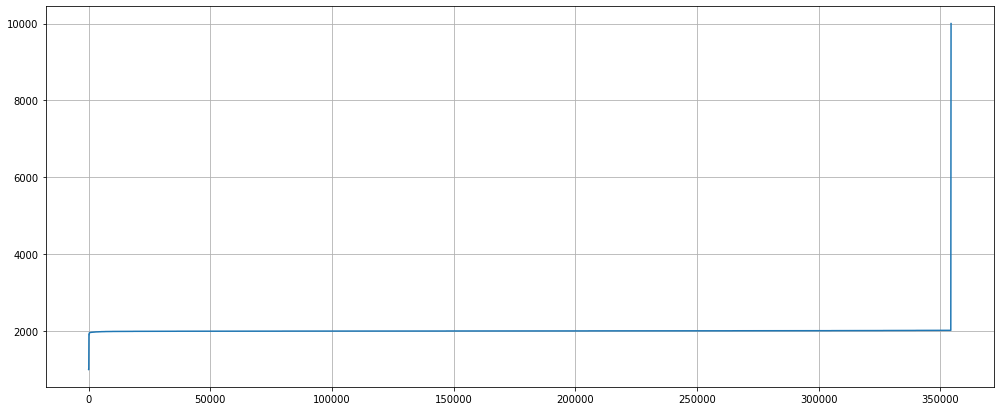

In [61]:
df['RegistrationYear'].sort_values(ignore_index=True).plot(figsize=(17,7), grid=True)

Que increíbles anuncios, tenemos autos del año 1000 y otros del año 9999. Tenemos varios valores fuera de un rango razonable, por ejemplo anuncios de autos registrados en el futuro y otros registrados hace más de 100 años atras. Estos podrían ser clásicos de colección, pero en el caso de autos registrados hace 500 o 1000 años atras se vuelve menos probable que sea el año correcto. Cortemos estos valores y veamos como se distribuye el resto de los años.

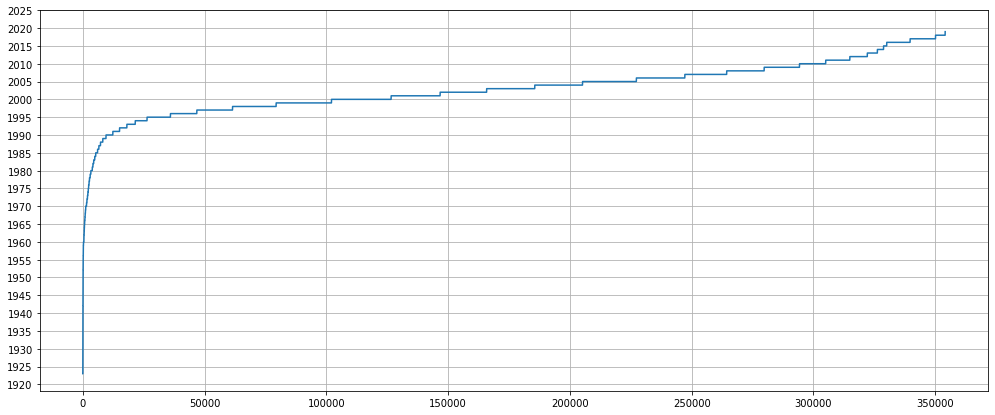

In [62]:
df[(df['RegistrationYear']<=2023) & (df['RegistrationYear']>1920)]['RegistrationYear'].sort_values(ignore_index=True).plot(figsize=(17,7), grid=True)
plt.yticks(np.arange(1920, 2030, 5))
plt.show()

In [63]:
len(df[(df['RegistrationYear']<=2023) & (df['RegistrationYear']>1990)])/len(df)

0.9645002807807681

Tenemos un rango más razonable, aunque sigue habiendo una gran cantidad de anuncios muy antiguos. Esto podría explorarse por el equipo técnico o en una siguiente investigación. Al igual que con la columna, consideraremos solo el rango con el comportamiento más estable. Consideraremos los anuncios con registros desde el año 1990 y el presente.

### Columnas categóricas

In [64]:
df['VehicleType'].value_counts(normalize=True)

sedan          0.288618
small          0.251929
wagon          0.205649
bus            0.090808
convertible    0.063756
coupe          0.051007
suv            0.037857
other          0.010376
Name: VehicleType, dtype: float64

Una gran variedad de tipos de automovil, aunque la mayoría de estos son de tipo sedan, small o wagon, también tenemos un pequeño grupo con tipo desconocido de automovil. Esta columna también cuenta con una importante cantidad de datos vacíos, en este caso los colocaremos en la categoría `other`.

In [65]:
df['Gearbox'].value_counts(normalize=True)

manual    0.80186
auto      0.19814
Name: Gearbox, dtype: float64

La mayoría de los autos son manuales, interesante considerando que la mayoría de los nuevos autos son automáticos de fábrica.

In [66]:
df['Model'].value_counts(normalize=True)

golf                  0.087347
other                 0.072972
3er                   0.059047
polo                  0.039042
corsa                 0.037560
                        ...   
serie_2               0.000024
rangerover            0.000012
serie_3               0.000012
range_rover_evoque    0.000006
serie_1               0.000006
Name: Model, Length: 250, dtype: float64

In [67]:
df['Model'].value_counts().describe()

count      250.000000
mean      1338.656000
std       3277.262009
min          2.000000
25%        145.250000
50%        369.000000
75%        888.750000
max      29232.000000
Name: Model, dtype: float64

<AxesSubplot:>

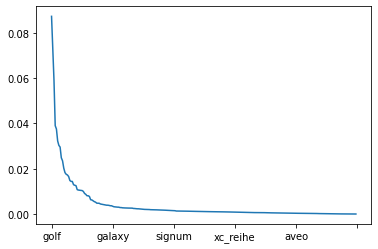

In [68]:
df['Model'].value_counts(normalize=True).plot()

250 modelos diferentes. Tenemos algunos favoritos, pero la cantidad de anuncios por modelo parece bastante baja. Por la gran cantidad de diferentes modelos, codificar esta columna para que nuestros modelos puedan procesarla será un problema. Hará que los modelos se tomen mucho tiempo en procesar y luego influenciará sus predicciones de forma desproporcionada al tener tantas diferencias entre las cantidades de anuncios por modelo. Tal vez sea mejor eliminar esta columna.

In [69]:
df['FuelType'].value_counts(normalize=True)

petrol      0.673000
gasoline    0.307085
lpg         0.016518
cng         0.001758
hybrid      0.000725
other       0.000635
electric    0.000280
Name: FuelType, dtype: float64

Aunque la mayoría de los autos parecen seguir siendo de combustión interna, es agradeble comenzar a ver algunos autos con otras formas de energía. Al igual que con la columna `VehicleType`, llenaremos los datos vacíos de esta columna con la categoría `other`.

In [70]:
df['Brand'].value_counts()

volkswagen        77013
opel              39931
bmw               36914
mercedes_benz     32046
audi              29456
ford              25179
renault           17927
peugeot           10998
fiat               9643
seat               6907
mazda              5615
skoda              5500
smart              5246
citroen            5148
nissan             4941
toyota             4606
hyundai            3587
sonstige_autos     3374
volvo              3210
mini               3202
mitsubishi         3022
honda              2817
kia                2465
suzuki             2323
alfa_romeo         2314
chevrolet          1754
chrysler           1439
dacia               900
daihatsu            806
subaru              762
porsche             758
jeep                677
trabant             589
land_rover          545
daewoo              542
saab                526
jaguar              505
rover               486
lancia              471
lada                225
Name: Brand, dtype: int64

In [71]:
df['NotRepaired'].value_counts()

no     247161
yes     36054
Name: NotRepaired, dtype: int64

Esta columna es además la que tiene la mayor cantidad de datos faltantes. Si vemos la mayoría de los datos existentes, podemos ver como llenar el resto de los datos. Por la gran mayoría que tienen, los datos vacíos pasarán a ser de la categoría *no*. También es bueno mencionar que esta columna podrá codificarse fácilmente sin la necesidad de crear columnas adicionales.

## Preparación de datos

Antes de alterar los datos al prepararlos, creemos una copia de los datos por si se necesitan comparaciones.

In [72]:
df_raw = df.copy()

### Columnas a eliminar

Nuestros modelos tendrán problemas con las columnas de fechas y las columnas PostalCode y Model solo confundirán a nuestros modelos. Eliminaremos todas estas columnas y le ahorraremos tiempo a los modelos.

In [73]:
# Eliminamos las columnas
df = df.drop(['DateCrawled', 'DateCreated', 'LastSeen', 'PostalCode', 'NumberOfPictures'], axis=1)

In [74]:
# Comprobamos como queda el DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Price              354369 non-null  int64 
 1   VehicleType        316879 non-null  object
 2   RegistrationYear   354369 non-null  int64 
 3   Gearbox            334536 non-null  object
 4   Power              354369 non-null  int64 
 5   Model              334664 non-null  object
 6   Mileage            354369 non-null  int64 
 7   RegistrationMonth  354369 non-null  int64 
 8   FuelType           321474 non-null  object
 9   Brand              354369 non-null  object
 10  NotRepaired        283215 non-null  object
dtypes: int64(5), object(6)
memory usage: 29.7+ MB


### Podado de datos atípicos

Apliquemos los límites que encontramos en la exploración de datos.

In [75]:
df = df[(df['Power']<=300) & (df['Power']>=40)]
df = df[(df['RegistrationYear']<=2023) & (df['RegistrationYear']>=1990)]

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302760 entries, 1 to 354368
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Price              302760 non-null  int64 
 1   VehicleType        280532 non-null  object
 2   RegistrationYear   302760 non-null  int64 
 3   Gearbox            296626 non-null  object
 4   Power              302760 non-null  int64 
 5   Model              290821 non-null  object
 6   Mileage            302760 non-null  int64 
 7   RegistrationMonth  302760 non-null  int64 
 8   FuelType           282432 non-null  object
 9   Brand              302760 non-null  object
 10  NotRepaired        255375 non-null  object
dtypes: int64(5), object(6)
memory usage: 27.7+ MB


Al parecer teníamos razón. La grán mayoría de los datos vacíos correspondía a los anuncios fuera de rangos normales. Ahora que tenemos datos dentro de rangos razonables, continuemos llenando los espacios que nos quedan.

### Datos vacíos

In [77]:
df['VehicleType'].fillna(value='other', axis=0, inplace=True)
df['FuelType'].fillna(value='other', axis=0, inplace=True)
df['Gearbox'].fillna(value='manual', axis=0, inplace=True)
df['NotRepaired'].fillna(value='no', axis=0, inplace=True)
df['Model'].fillna(value='unkown', axis=0, inplace=True)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302760 entries, 1 to 354368
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Price              302760 non-null  int64 
 1   VehicleType        302760 non-null  object
 2   RegistrationYear   302760 non-null  int64 
 3   Gearbox            302760 non-null  object
 4   Power              302760 non-null  int64 
 5   Model              302760 non-null  object
 6   Mileage            302760 non-null  int64 
 7   RegistrationMonth  302760 non-null  int64 
 8   FuelType           302760 non-null  object
 9   Brand              302760 non-null  object
 10  NotRepaired        302760 non-null  object
dtypes: int64(5), object(6)
memory usage: 27.7+ MB


### Columnas `str`

Ahora codifiquemos las columnas con datos de tipo `str` para que nuestros modelos no tengan problemas.

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302760 entries, 1 to 354368
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Price              302760 non-null  int64 
 1   VehicleType        302760 non-null  object
 2   RegistrationYear   302760 non-null  int64 
 3   Gearbox            302760 non-null  object
 4   Power              302760 non-null  int64 
 5   Model              302760 non-null  object
 6   Mileage            302760 non-null  int64 
 7   RegistrationMonth  302760 non-null  int64 
 8   FuelType           302760 non-null  object
 9   Brand              302760 non-null  object
 10  NotRepaired        302760 non-null  object
dtypes: int64(5), object(6)
memory usage: 27.7+ MB


In [80]:
df_ = df.copy()

# Aplicamos el método OrdinalEncoder
enc = OrdinalEncoder()
df_enc = df_.copy()
df_enc[['VehicleType', 'FuelType', 'NotRepaired', 'Gearbox', 'Model', 'Brand']] = enc.fit_transform(df_[['VehicleType', 'FuelType', 'NotRepaired', 'Gearbox', 'Model', 'Brand']])

# Eliminamos las columnas Model y Brand por su gran cantidd de variables
df_ = df.drop(['Model', 'Brand'], axis=1)

# Creamos las variables dummies, excepto por las columnas Model y Brand por su gran cantidad
df_ohe = pd.get_dummies(df_, drop_first=True)

# Veamos como queda el set de datos
df_ohe.shape

(302760, 20)

## Features y targets

In [81]:
rs = RandomState(54321) # Fijemos una semilla para estabilidad

Separamos los datos codificados con OrdinalEncoder:

In [82]:
# Separamos los datos para la validación
rest_enc, valid = train_test_split(df_enc, test_size=0.20, random_state=rs)

# Separamos los datos para entrenamiento y testeo
train, test = train_test_split(rest_enc, test_size=0.25, random_state=rs)

# Creamos features y targets para entrenaminto
features_train_enc = train.drop('Price', axis=1)
targets_train_enc = train['Price']

# Creamos features y targets para testeo
features_test_enc = test.drop('Price', axis=1)
targets_test_enc = test['Price']

# Creamos features y targets para validación
features_valid_enc = valid.drop('Price', axis=1)
targets_valid_enc = valid['Price']

# Creamos features y targets para el entrenamiento de la validación
features_rest_enc = rest_enc.drop('Price', axis=1)
targets_rest_enc = rest_enc['Price']

# Comprobemos el tamaño de los sets
print(features_train_enc.shape)
print(targets_train_enc.shape)
print(features_test_enc.shape)
print(targets_test_enc.shape)
print(features_valid_enc.shape)
print(targets_valid_enc.shape)

(181656, 10)
(181656,)
(60552, 10)
(60552,)
(60552, 10)
(60552,)


Separamos los datos codificados con OHE:

In [83]:
# Separamos los datos para la validación
rest_ohe, valid = train_test_split(df_ohe, test_size=0.20, random_state=rs)

# Separamos los datos para entrenamiento y testeo
train, test = train_test_split(rest_ohe, test_size=0.25, random_state=rs)

# Creamos features y targets para entrenaminto
features_train_ohe = train.drop('Price', axis=1)
targets_train_ohe = train['Price']

# Creamos features y targets para testeo
features_test_ohe = test.drop('Price', axis=1)
targets_test_ohe = test['Price']

# Creamos features y targets para validación
features_valid_ohe = valid.drop('Price', axis=1)
targets_valid_ohe = valid['Price']

# Creamos features y targets para el entrenamiento de la validación
features_rest_ohe = rest_ohe.drop('Price', axis=1)
targets_rest_ohe = rest_ohe['Price']

# Comprobemos el tamaño de los sets
print(features_train_ohe.shape)
print(targets_train_ohe.shape)
print(features_test_ohe.shape)
print(targets_test_ohe.shape)
print(features_valid_ohe.shape)
print(targets_valid_ohe.shape)

(181656, 19)
(181656,)
(60552, 19)
(60552,)
(60552, 19)
(60552,)


Ahora separamos los datos no codificados:

In [84]:
# Separamos los datos para la validación
rest, valid = train_test_split(df, test_size=0.20, random_state=rs)

# Separamos los datos para entrenamiento y testeo
train, test = train_test_split(rest, test_size=0.25, random_state=rs)

# Creamos features y targets para entrenaminto
features_train = train.drop('Price', axis=1)
targets_train = train['Price']

# Creamos features y targets para testeo
features_test = test.drop('Price', axis=1)
targets_test = test['Price']

# Creamos features y targets para validación
features_valid = valid.drop('Price', axis=1)
targets_valid = valid['Price']

# Creamos features y targets para el entrenamiento de la validación
features_rest = rest.drop('Price', axis=1)
targets_rest = rest['Price']

# Comprobemos el tamaño de los sets
print(features_train.shape)
print(targets_train.shape)
print(features_test.shape)
print(targets_test.shape)
print(features_valid.shape)
print(targets_valid.shape)

(181656, 10)
(181656,)
(60552, 10)
(60552,)
(60552, 10)
(60552,)


# Entrenamiento del modelo 

## Prueba de cordura con regresión lineal

In [86]:
reg = LinearRegression()
print('Tiempo de entrenamiento:')
%time reg.fit(features_train_ohe, targets_train_ohe)
print()
print('Tiempo de predicción:')
%time reg_pred_ohe = reg.predict(features_valid_ohe)
print()
print('RECM:')
print(mean_squared_error(targets_valid_ohe, reg_pred_ohe)**0.5)

Tiempo de entrenamiento:
CPU times: user 146 ms, sys: 75.5 ms, total: 221 ms
Wall time: 282 ms

Tiempo de predicción:
CPU times: user 0 ns, sys: 88.2 ms, total: 88.2 ms
Wall time: 97.6 ms

RECM:
2662.372294314971


## Bosque aleatorio con ajuste de hiperparámetros

In [87]:
score = max(df['Price'])
n=1
for roots in range(3,8):
    for leafs in range(3,8):
        print('Ronda', n)
        forest = RandomForestRegressor(random_state=rs, max_depth=roots, min_samples_leaf=leafs)
        print('Tiempo de entrenamiento')
        %time forest.fit(features_train_enc, targets_train_enc)
        print('Tiempo de predicción')
        %time f_pred = forest.predict(features_valid_enc)
        sco = mean_squared_error(targets_valid_enc, f_pred)**0.5
        print('RECM:', sco)
        print()
        if sco<score:
            score = sco
            best_root = roots
            best_leaf = leafs
            best_pred = f_pred
            best_n = n
        n+=1

best_forest = RandomForestRegressor(random_state=rs, max_depth=best_root, min_samples_leaf=best_leaf)
print()
print('Mejor ronda:', best_n)
print('Mejor RECM:', score)

Ronda 1
Tiempo de entrenamiento
CPU times: user 12.2 s, sys: 4.32 ms, total: 12.2 s
Wall time: 12.3 s
Tiempo de predicción
CPU times: user 178 ms, sys: 0 ns, total: 178 ms
Wall time: 178 ms
RECM: 2842.757068515389

Ronda 2
Tiempo de entrenamiento
CPU times: user 13.7 s, sys: 27.5 ms, total: 13.7 s
Wall time: 15.1 s
Tiempo de predicción
CPU times: user 214 ms, sys: 0 ns, total: 214 ms
Wall time: 213 ms
RECM: 2843.788395609732

Ronda 3
Tiempo de entrenamiento
CPU times: user 14.7 s, sys: 8.28 ms, total: 14.7 s
Wall time: 14.7 s
Tiempo de predicción
CPU times: user 195 ms, sys: 0 ns, total: 195 ms
Wall time: 195 ms
RECM: 2841.126336913907

Ronda 4
Tiempo de entrenamiento
CPU times: user 14.2 s, sys: 15.7 ms, total: 14.2 s
Wall time: 15.6 s
Tiempo de predicción
CPU times: user 209 ms, sys: 11 µs, total: 209 ms
Wall time: 208 ms
RECM: 2842.9242798929736

Ronda 5
Tiempo de entrenamiento
CPU times: user 14.7 s, sys: 32.2 ms, total: 14.7 s
Wall time: 14.7 s
Tiempo de predicción
CPU times: user

El error comienza a bajar, vamos por el camino correcto. Continuemos con los otros modelos.

## CatBoost 

In [88]:
cat = CatBoostRegressor(iterations=200, cat_features=['VehicleType', 'FuelType', 'NotRepaired', 'Gearbox' , 'Model', 'Brand'])
print('Tiempo de entrenamiento:')
%time cat.fit(features_train, targets_train, eval_set=(features_valid, targets_valid))
print()
print('Tiempo de predicción:')
%time cat_pred = cat.predict(features_valid)
print(mean_squared_error(targets_valid, cat_pred)**0.5)

Tiempo de entrenamiento:
Learning rate set to 0.307588
0:	learn: 3657.0634461	test: 3633.3339094	best: 3633.3339094 (0)	total: 350ms	remaining: 1m 9s
1:	learn: 3081.2821593	test: 3056.1722888	best: 3056.1722888 (1)	total: 735ms	remaining: 1m 12s
2:	learn: 2705.7786341	test: 2683.7706137	best: 2683.7706137 (2)	total: 1.04s	remaining: 1m 8s
3:	learn: 2433.5986991	test: 2411.8094504	best: 2411.8094504 (3)	total: 1.35s	remaining: 1m 6s
4:	learn: 2262.7276070	test: 2243.1399497	best: 2243.1399497 (4)	total: 1.69s	remaining: 1m 5s
5:	learn: 2155.4552932	test: 2136.1549837	best: 2136.1549837 (5)	total: 2.02s	remaining: 1m 5s
6:	learn: 2082.3766436	test: 2063.0159604	best: 2063.0159604 (6)	total: 2.3s	remaining: 1m 3s
7:	learn: 2024.8213761	test: 2004.4715910	best: 2004.4715910 (7)	total: 2.51s	remaining: 1m
8:	learn: 1984.6773906	test: 1965.3154633	best: 1965.3154633 (8)	total: 2.76s	remaining: 58.6s
9:	learn: 1953.9844665	test: 1933.6825279	best: 1933.6825279 (9)	total: 3s	remaining: 56.9s
1

Aplicando modelos de potenciación de gradiente obtenemos resultados mucho mejores que con los 2 modelos anteriores. Al mismo tiempo, el tiempo que este se demora en ejecutarse es mucho menor que el tiempo total que se demora el bosque aleatorio. Por ahora este es nuestra mejor opción.

## LightGBM con ajuste de hiperparámetros

Para aplicar este modelo primero cambiemos el tipo de datos para las columnas categóricas.

In [89]:
features_train[['VehicleType', 'FuelType', 'NotRepaired', 'Gearbox' , 'Model', 'Brand']]= features_train[['VehicleType', 'FuelType', 'NotRepaired', 'Gearbox' , 'Model', 'Brand']].astype('category')
features_valid[['VehicleType', 'FuelType', 'NotRepaired', 'Gearbox' , 'Model', 'Brand']]= features_valid[['VehicleType', 'FuelType', 'NotRepaired', 'Gearbox' , 'Model', 'Brand']].astype('category')
features_test[['VehicleType', 'FuelType', 'NotRepaired', 'Gearbox' , 'Model', 'Brand']]= features_test[['VehicleType', 'FuelType', 'NotRepaired', 'Gearbox' , 'Model', 'Brand']].astype('category')
features_rest[['VehicleType', 'FuelType', 'NotRepaired', 'Gearbox' , 'Model', 'Brand']]= features_rest[['VehicleType', 'FuelType', 'NotRepaired', 'Gearbox' , 'Model', 'Brand']].astype('category')

Ahora creemos, entrenemos y apliquemos el modelo LightGBM.

In [90]:
lgbm = lgb.LGBMRegressor(random_state=rs)
print('Tiempo de entrenamiento:')
%time lgbm.fit(features_train, targets_train,eval_metric = 'RMSE', categorical_feature=['VehicleType', 'FuelType', 'NotRepaired', 'Gearbox' , 'Model', 'Brand'], eval_set=(features_valid, targets_valid))
print()
print('Tiempo de predicción:')
%time lgbm_pred = lgbm.predict(features_valid)
print(mean_squared_error(targets_valid, lgbm_pred)**0.5)

Tiempo de entrenamiento:


/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Brand', 'FuelType', 'Gearbox', 'Model', 'NotRepaired', 'VehicleType']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[1]	valid_0's rmse: 4180.11	valid_0's l2: 1.74733e+07
[2]	valid_0's rmse: 3886.96	valid_0's l2: 1.51084e+07
[3]	valid_0's rmse: 3629.22	valid_0's l2: 1.31712e+07
[4]	valid_0's rmse: 3402.73	valid_0's l2: 1.15786e+07
[5]	valid_0's rmse: 3199.49	valid_0's l2: 1.02368e+07
[6]	valid_0's rmse: 3021.25	valid_0's l2: 9.12793e+06
[7]	valid_0's rmse: 2865.32	valid_0's l2: 8.21005e+06
[8]	valid_0's rmse: 2723.8	valid_0's l2: 7.41907e+06
[9]	valid_0's rmse: 2600.01	valid_0's l2: 6.76006e+06
[10]	valid_0's rmse: 2491.92	valid_0's l2: 6.20968e+06
[11]	valid_0's rmse: 2397.19	valid_0's l2: 5.74651e+06
[12]	valid_0's rmse: 2312.48	valid_0's l2: 5.34755e+06
[13]	valid_0's rmse: 2238.05	valid_0's l2: 5.00885e+06
[14]	valid_0's rmse: 2172.63	valid_0's l2: 4.72031e+06
[15]	valid_0's rmse: 2114.32	valid_0's l2: 4.47037e+06
[16]	valid_0's rmse: 2065.64	valid_0's l2: 4.26686e+06
[17]	valid_0's rmse: 2021.57	valid_0's l2: 4.08673e+06
[18]	valid_0's rmse: 1981.9	valid_0's l2: 3.92791e+06
[19]	valid_0's rmse: 

El error ha llegado a sus niveles más bajos y el tiempo de ejecución ha disminuido enormemente. Hemos encontrado el mejor modelo.

# Análisis del modelo

Con todos los modelos aplicados, hemos visto una mejora constante en los valores de error. Llegando a los resultados más bajos con los modelos `CatBoost` y `LightGBM`, con solo una ligera diferencia entre sus valores finales. Como uno de los factores principales era el tiempo tomado por cada modelo en la ejecución de su entrenamiento y predicción, será este factor el que termine siendo decisivo para elegir el mejor modelo.

En primer lugar debemos considerar que los tiempos de entrenamiento y predicción son muy diferentes, con este último siendo mucho menor que el primero. Podría ser posible que si un gran número de predicciones se estén haciendo continuamente, las pequeñas diferencias entre estos tiempos pueda tomar importancia, pero su similitud hace que tengan menor importancia frente al tiempo de entrenamiento. Podríamos pensar que este se aplicaría una sola vez, pero cada vez que queramos actualizar al modelo deberemos considerar este tiempo. Entre los 2 mejores modelos, el modelo `LightGBM` toma una decima del tiempo en entrenarse del modelo `CatBoost` y obtener resultados, por lo que queda como el modelo superior bajo todas las necesidades del sitio de anuncios.

Antes de terminar, entrenemos un último modelo `LightGBM` con todos los datos restantes y hagamos el último testeo. Deberíamos obtener resultados similares a los obtenidos en su entrenamiento original.

In [91]:
lgbm = lgb.LGBMRegressor(random_state=rs)
print('Tiempo de entrenamiento:')
%time lgbm.fit(features_rest, targets_rest, eval_metric = 'RMSE', categorical_feature=['VehicleType', 'FuelType', 'NotRepaired', 'Gearbox' , 'Model', 'Brand'], eval_set=(features_test, targets_test))
print()
print('Tiempo de predicción:')
%time lgbm_pred = lgbm.predict(features_test)
print(mean_squared_error(targets_test, lgbm_pred)**0.5)

Tiempo de entrenamiento:


/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Brand', 'FuelType', 'Gearbox', 'Model', 'NotRepaired', 'VehicleType']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[1]	valid_0's rmse: 4172.57	valid_0's l2: 1.74103e+07
[2]	valid_0's rmse: 3879.05	valid_0's l2: 1.50471e+07
[3]	valid_0's rmse: 3622.42	valid_0's l2: 1.31219e+07
[4]	valid_0's rmse: 3392.08	valid_0's l2: 1.15062e+07
[5]	valid_0's rmse: 3189.98	valid_0's l2: 1.0176e+07
[6]	valid_0's rmse: 3011.64	valid_0's l2: 9.06995e+06
[7]	valid_0's rmse: 2855.61	valid_0's l2: 8.15449e+06
[8]	valid_0's rmse: 2719.13	valid_0's l2: 7.39369e+06
[9]	valid_0's rmse: 2594.84	valid_0's l2: 6.7332e+06
[10]	valid_0's rmse: 2485.07	valid_0's l2: 6.17557e+06
[11]	valid_0's rmse: 2388.65	valid_0's l2: 5.70562e+06
[12]	valid_0's rmse: 2303.89	valid_0's l2: 5.30793e+06
[13]	valid_0's rmse: 2229.97	valid_0's l2: 4.97276e+06
[14]	valid_0's rmse: 2165.36	valid_0's l2: 4.68877e+06
[15]	valid_0's rmse: 2109.38	valid_0's l2: 4.44949e+06
[16]	valid_0's rmse: 2058.92	valid_0's l2: 4.23917e+06
[17]	valid_0's rmse: 2015.54	valid_0's l2: 4.0624e+06
[18]	valid_0's rmse: 1976.22	valid_0's l2: 3.90545e+06
[19]	valid_0's rmse: 1

Podemos ver que los valores de error finales de este modelo son mejores que los de su antecesor. Si logramos seguir entrenando este modelo con la mayor cantidad de información disponible, es probable que sus resultados continuarán mejorando. También tendríamos una aumento en el tiempo de entrenamiento, pero este sería un problema común a todos los modelos y aún así sería menor en este caso.